# Figures and Tables

This notebook serves as a playground for developing figures and tables for this project.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd '/Users/ssomani/research/heartlab/statins_reddit/'

/Users/ssomani/research/heartlab/statins_reddit


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from joypy import joyplot
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap as lin_seg_cmap

In [4]:
import numpy as np
import pandas as pd

## Figure 1

In [5]:
# Gather the data
df = pd.read_excel('data/raw/posts_comms_20220712.xlsx')
df['date_year'] = pd.to_datetime(df['date']).dt.year.astype('int')

# Sort our subreddits by their frequency for our ridgeline plot.
df['_subreddit_sort'] = df['subreddit'].map(df['subreddit'].value_counts())
df = df.sort_values(by='_subreddit_sort', ascending=False)

# Get all years represented
years = np.array(df['date_year'].unique(), dtype='int')

Text(0.5, 1.0, 'Statin-Related Posts and Comments by Subreddit Over Time')

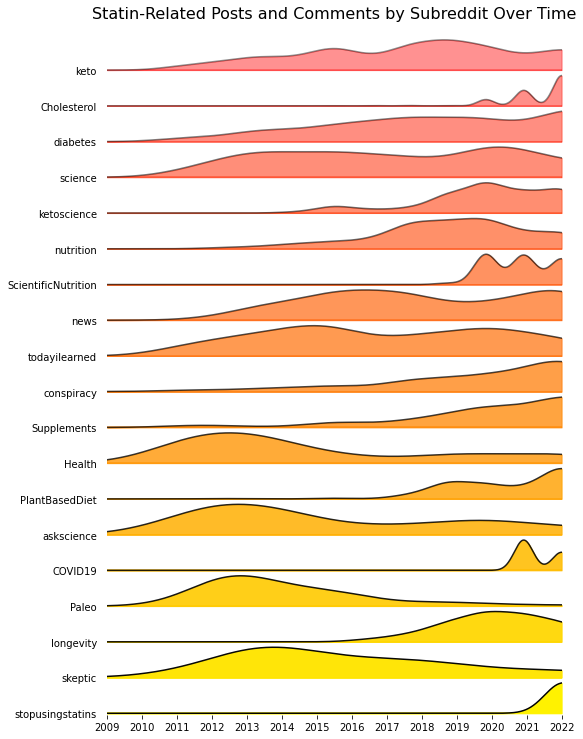

In [22]:
_, ax = joyplot(df.groupby('subreddit', sort=False), column='date_year', \
             ylim='own', overlap=0.05, figsize=(8, 10), \
             colormap=cm.autumn, fade=True, x_range=(years.min(), 2021),
               )

ax[-1].set_xticks(years);
ax[-1].set_xticklabels(years);
ax[0].set_title('Statin-Related Posts and Comments by Subreddit Over Time', fontsize=16, pad=20)

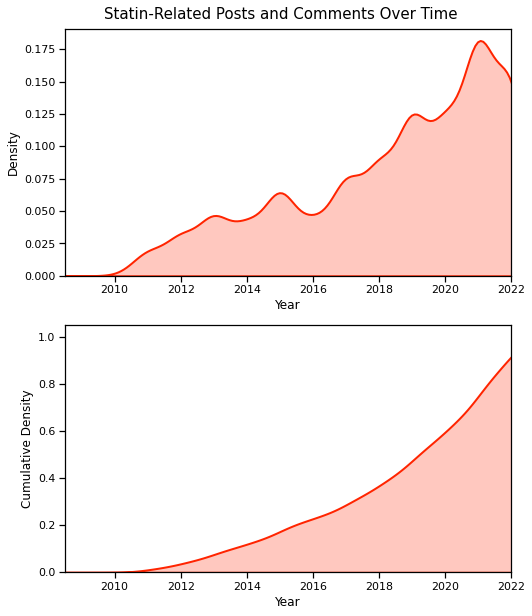

In [21]:
with sns.plotting_context('notebook'):
    sns.set_palette('autumn')
    fig, ax = plt.subplots(2, 1, figsize=(8, 10))
    sns.kdeplot(df['date_year'], shade=True, linewidth=2, ax=ax[0])
    ax[0].set_xlabel('Year')
    ax[0].set_xlim((years.min() - 0.5, 2022))
    ax[0].set_ylabel('Density')
    
    sns.kdeplot(df['date_year'], linewidth=2, shade=True, cumulative=True, ax=ax[1])
    ax[1].set_xlabel('Year')
    ax[1].set_xlim((years.min() - 0.5, 2022))
    ax[1].set_ylabel('Cumulative Density')
    
    fig.suptitle('Statin-Related Posts and Comments Over Time', fontsize=15, y=0.91)

## Figure 2

In [5]:
from reddit.topic_modeling import BERedditTopics, config as bert_config

/Users/ssomani/mambaforge/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
topic_model = BERedditTopics(bert_config)

In [10]:
topic_model.load_data_frame()

In [11]:
topic_model.create_topic_model()

100%|████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:03<00:00, 25.51it/s]
